# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Ex 2.1: Load the data using Pandas read_csv, use `show_id` as the index_col parameter. 

data_path = "../data/netflix_titles.csv"

movies_df = pd.read_csv(data_path, index_col = 'show_id')

movies_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [4]:
# Ex 2.2: What is the min and max release years?

min_year = movies_df['release_year'].min()
max_year = movies_df['release_year'].max()

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [5]:
# Ex 2.3: How many director names are missing values (NaN)?

num_missing_directors = movies_df['director'].isna().sum()

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [ ]:
# Ex 2.4: How many different countries are there in the data?

# You will need to fill the NaN (missing) values with the string "Unknown" first. 
# Then list the unique entries. As some of them are lists of countries already, because that movie/series was produced in multiple countries, 
# you will need to join with ", " all the elements of the list into a single string, and then split it by ", " to get a list of all the individual countries.

# Finally, you can get the number of unique countries by getting the length of the list of unique countries, you can use a set {} to get the unique countries or convert the entire
# list into a pd.Series and use .unique() to get the list of unique countries and then its number.

n_countries = None  # TODO n_countries has to be a single integer number with the unique number of different countries (you can build this in multiple lines and steps)

print(f"There are {n_countries} different countries in the data")

In [13]:
#movies_df['country'].unique()
movies_df['country'].fillna(value='Unknown', inplace=True)
print(movies_df['country'].isna().sum())

0


In [14]:
movies_df['country'][20:30]

show_id
s21                         Unknown
s22                          Turkey
s23                         Unknown
s24                         Unknown
s25                           India
s26                       Australia
s27                         Unknown
s28                   United States
s29                   United States
s30    United States, India, France
Name: country, dtype: object

In [24]:
# test = movies_df['country'].iloc[29]

# test.split(', ')

['United States', 'India', 'France']

In [25]:
# First way

movies_df['country'] = movies_df['country'].apply(lambda x: x.split(', '))

movies_df['country'][20:30]

show_id
s21                         [Unknown]
s22                          [Turkey]
s23                         [Unknown]
s24                         [Unknown]
s25                           [India]
s26                       [Australia]
s27                         [Unknown]
s28                   [United States]
s29                   [United States]
s30    [United States, India, France]
Name: country, dtype: object

In [26]:
raw_list_countr=movies_df['country'].to_list()
raw_list_countr

[['United States'],
 ['South Africa'],
 ['Unknown'],
 ['Unknown'],
 ['India'],
 ['Unknown'],
 ['Unknown'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['Unknown'],
 ['Unknown'],
 ['Germany', 'Czech Republic'],
 ['Unknown'],
 ['Unknown'],
 ['United States'],
 ['Unknown'],
 ['Mexico'],
 ['Unknown'],
 ['Unknown'],
 ['Unknown'],
 ['Turkey'],
 ['Unknown'],
 ['Unknown'],
 ['India'],
 ['Australia'],
 ['Unknown'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['Unknown'],
 ['Unknown'],
 ['United Kingdom'],
 ['Unknown'],
 ['Unknown'],
 ['Unknown'],
 ['Unknown'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['Unknown'],
 ['South Africa', 'United States', 'Japan'],
 ['Unknown'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['J

In [ ]:
#  def flatten_comprehension(matrix):
# ...     return [item for row in matrix for item in row]

In [29]:
flat_list_countr = [item for row in raw_list_countr for item in row]
len(set(flat_list_countr))

128

In [31]:
# Second way

movies_df['country'].explode().nunique()

128

In [17]:
# Ex 2.5: How many characters long are on average the title names?
 
# hint: (create a new column with the titles length if needed, you can use the apply method like .apply(lambda x: len(x)) , then get the mean of that column)

movies_df['titles_length'] = movies_df['title'].apply(lambda x: len(x))
movies_df.titles_length.head()
avg_title_length = round(movies_df['titles_length'].mean(),2)

print(f"The average title length is {avg_title_length} characters")

The average title length is 17.73 characters


country
United States            54
India                    35
Unknown                  16
Japan                     7
Egypt                     5
United Kingdom            5
Turkey                    5
United States, Canada     4
Thailand                  4
Canada                    4
Name: count, dtype: int64


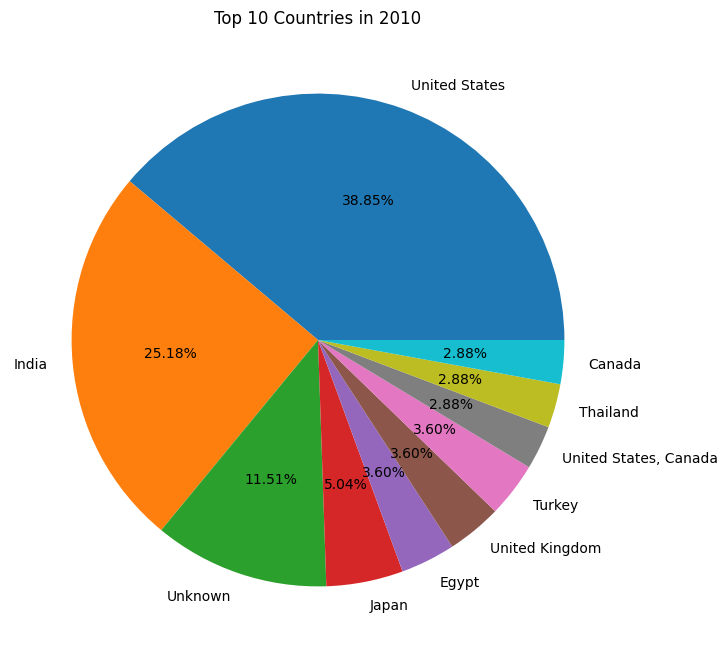

In [21]:
# Ex 2.6: For a given year, get the Pandas Series of how many movies and series combined were made by every country, limit it to the top 10 countries.

# It's optional to clean or modify the data of countries in this case, you can just use the data as it is.

# hint: (you can use the .loc method to filter the data by year, and then use the .value_counts() method to get the number of movies and series combined for each country, 
# finally use the head(10) method to get the top 10 countries)

year = 2010   # you can try to change the year to see the results for different years

movies_year = movies_df.loc[movies_df['release_year'] == year]


top_10_countries = movies_year['country'].value_counts(ascending=False).head(10)
print(top_10_countries)

# Code to plot the pie chart from your data results
fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()


In [27]:
# movies_df.loc[movies_df['type'] == 'Movie']['duration'].head()

# movies_f_df = movies_df.loc[movies_df['type'] == 'Movie']
# #movies_f_df.loc[:, 'min_duration']=movies_f_df['duration'].apply(lambda x: x[:-4])

# movies_f_df['min_duration']=movies_f_df['duration'].apply(lambda x: x[:-4])

# movies_f_df['min_duration']


C:\Users\user\AppData\Local\Temp\ipykernel_11272\1112970626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_f_df.loc[:, 'min_duration']=movies_f_df['duration'].apply(lambda x: x[:-4])


show_id
s1        90
s7        91
s8       125
s10      104
s13      127
        ... 
s8802     96
s8803    158
s8805     88
s8806     88
s8807    111
Name: min_duration, Length: 6131, dtype: object

In [36]:
movies_df['min_duration']=movies_df['duration'].apply(lambda x: x[:-4])
movies_df['min_duration']

movies_f_df = movies_df.loc[movies_df['type'] == 'Movie']

movies_f_df.head()

movies_f_df.loc[:,'min_duration']=movies_f_df['min_duration'].astype(int)

movies_f_avg_dur = movies_f_df.groupby('release_year')['min_duration'].mean()

movies_f_avg_dur

release_year
1942         35.0
1943    62.666667
1944         52.0
1945    51.333333
1946         58.0
          ...    
2017    95.507171
2018    96.185137
2019    93.466035
2020    92.141199
2021    96.444043
Name: min_duration, Length: 73, dtype: object

In [41]:
type(movies_f_avg_dur)

pandas.core.series.Series

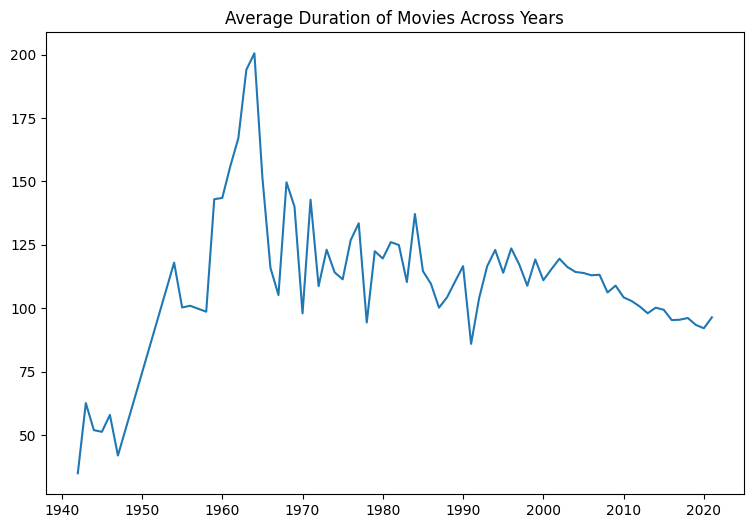

In [42]:
# Ex 2.7: Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. 

# (hint: you can create a new column with the integer value of the minutes of the movies, it's possible to do it with the .apply() 
# method and a lambda function, getting only stripping the minutes of it and converting the digit number to an integer
# or you can also do this process with a for loop over the dataframe rows like <for row_id, row in df.iterrows(): > creating every new value of that row for the new column

# Then use groupby year and in order to average on that movies minutes column)

movies_avg_duration_per_year = None  # TODO: movies_avg_duration_per_year has to be a Pandas Series with the average duration of movies per year


fig = plt.figure(figsize=(9, 6))
#plt.plot(albury_weather_df["Rainfall"])
# TODO: generate the line plot using plt.plot() and the information from movies_avg_duration_per_year (the vertical axis with the minutes value) and its index (the horizontal axis with the years)
plt.plot(movies_f_avg_dur)

plt.title("Average Duration of Movies Across Years")

plt.show()